In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [45]:
chimp_data = pd.read_table('chimp_data.txt')
dog_data = pd.read_table('dog_data.txt')
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [46]:
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [47]:
# Funktion zur Umwandlung von Sequenzzeichenfolgen in k-Mer-Wörter, Standardgröße = 6 (Hexamer-Wörter)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [48]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [49]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [50]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [51]:
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [52]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values                       

dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values

In [53]:
# Erstellen des Bag of Words-Modells mit CountVectorizer()
# Dies entspricht der k-mer-Zählung
# Die n-Gramm-Größe von 4 wurde zuvor durch Tests ermittelt
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


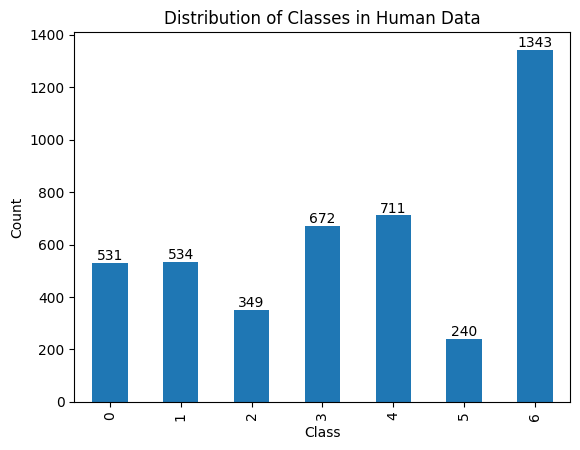

In [54]:
import matplotlib.pyplot as plt

counts = human_data['class'].value_counts().sort_index()
counts.plot(kind='bar')

for i in range(len(counts)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Human Data')
plt.show()

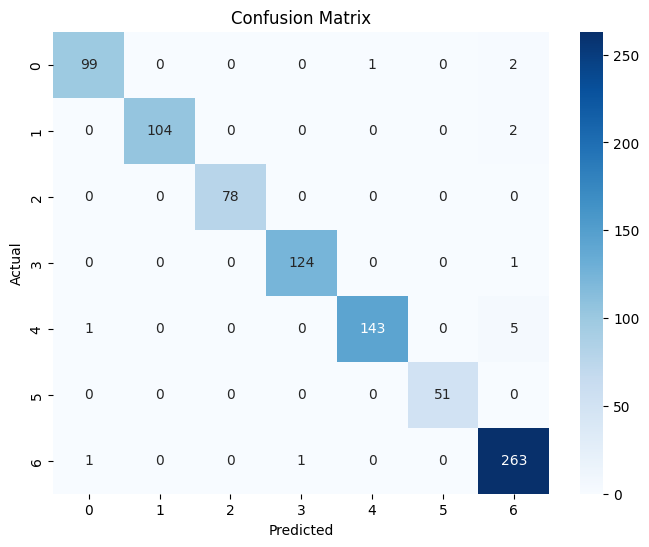

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.20, random_state=42)
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

## Zusammenfassung

Das erstellte Modell verwendet ein Bag-of-Words-Ansatz, um DNA-Sequenzen zu klassifizieren. Ziel war es, menschliche, Schimpansen- und Hunde-DNA zu unterscheiden. Dazu wurden k-Mer-Wörter (in diesem Fall Hexamer-Wörter) aus den Sequenzen extrahiert und als Features für das Modell verwendet. Ein Multinomial-Naive-Bayes-Klassifikator wurde trainiert und evaluiert, um die Klassifikation durchzuführen.

### Ergebnisse:


#### Metriken:
- Genauigkeit: 0.984
- Präzision: 0.984
- Recall: 0.984
- F1-Score: 0.984

### Zweck des Modells:

Der Zweck dieses Modells besteht darin, DNA-Sequenzen zu klassifizieren und zwischen menschlicher, Schimpansen- und Hunde-DNA zu unterscheiden. Solche Modelle sind in der Bioinformatik und Genomik von entscheidender Bedeutung, da sie dazu beitragen, genetische Informationen zu analysieren und zu interpretieren. In diesem speziellen Fall könnte das Modell beispielsweise bei der Identifizierung von Genen helfen, die spezifisch für eine bestimmte Art sind, oder bei der Untersuchung von evolutionären Verwandtschaften zwischen Arten.

### Anwendungsbereiche:

- **Biologische Forschung:**
  - Identifizierung von spezifischen Genen oder DNA-Regionen.
  - Untersuchung evolutionärer Verwandtschaften zwischen Arten.
  - Erforschung der genetischen Grundlagen von Krankheiten.
  
- **Medizinische Diagnostik:**
  - Erkennung von genetischen Anomalien oder Krankheitsrisiken.

### Warum haben wir dieses Modell erstellt und wo könnte es eingesetzt werden:

- **Klassifizierung von DNA-Sequenzen:**
  - DNA-Sequenzen können umfangreich sein, und es ist oft schwierig, sie manuell zu analysieren. Ein maschinelles Lernmodell kann dabei helfen, sie effizient zu klassifizieren.
  
- **Bioinformatik und Genomik:**
  - In der Bioinformatik und Genomik werden solche Modelle häufig verwendet, um genetische Daten zu analysieren und zu verstehen.

- **Evolutionäre Studien:**
  - Es kann dabei helfen, evolutionäre Beziehungen zwischen Arten zu erforschen.

- **Medizinische Diagnostik:**
  - In der medizinischen Diagnostik kann es genutzt werden, um genetische Ursachen von Krankheiten zu untersuchen.

### Warum wir dieses Modell benötigen:

- **Effizienz:**
  - Ein maschinelles Lernmodell kann große Mengen genetischer Daten viel schneller und effizienter verarbeiten als menschliche Experten.
  
- **Genauigkeit:**
  - Das Modell kann eine hohe Genauigkeit bei der Klassifizierung von DNA-Sequenzen erreichen.
  
- **Automatisierung:**
  - Es kann Routineaufgaben automatisieren und ermöglicht die schnelle Analyse großer Datensätze.

### Schlussfolgerung:

Insgesamt liefert das erstellte Modell eine robuste Methode zur Klassifizierung von DNA-Sequenzen und kann in verschiedenen Bereichen der Biologie, Medizin und Bioinformatik eingesetzt werden, um genetische Informationen zu analysieren und zu interpretieren.
